In [1]:
# import the required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

from sklearn.preprocessing import StandardScaler

# Table of Contents
## [1. HR Analytics](#hr)
### [1,1 Load and Explore the data](#hrload)
### [1.2 Cleanse and Transform the data](#hrtransform)
### [1.3 Correlation Analysis](#hrcorr)
### [1.4 Exporting the data](#hrexport)
## [2. Airbnb](#air)
### [1,1 Load and Explore the data](#airload)
### [1.2 Cleanse and Transform the data](#airtransform)
### [1.3 Correlation Analysis](#aircorr)
### [1.4 Exporting the data](#airexport)

## 1. HR Analytics <a id="hr"></a>

### 1.1 Load and Explore the data <a id="hrload"></a>

In [2]:
hr_df = pd.read_csv("./hr_data.csv")
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#information of the dataframe
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#description of the dataframe
hr_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
#checking of null values 
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Distribution of employees based on departments

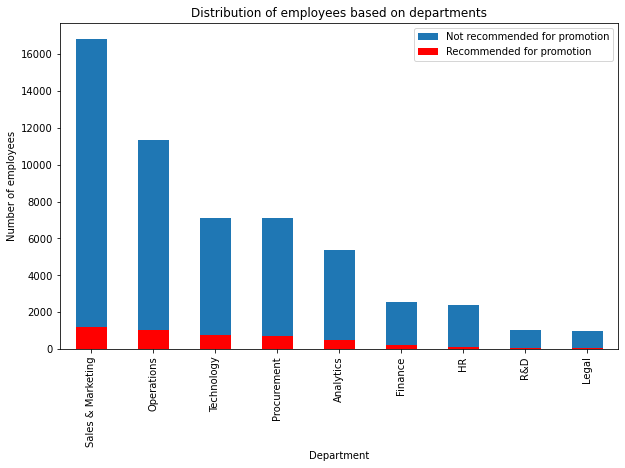

In [6]:
plt.subplots(figsize = (10,6))
hr_df.department.value_counts().plot.bar()
hr_df[hr_df.is_promoted == 1].department.value_counts().plot.bar(color = 'r')
plt.ylabel('Number of employees')
plt.xlabel('Department')
plt.legend(['Not recommended for promotion','Recommended for promotion'])
plt.title('Distribution of employees based on departments')
plt.show()

#### Distribution of employees based on region

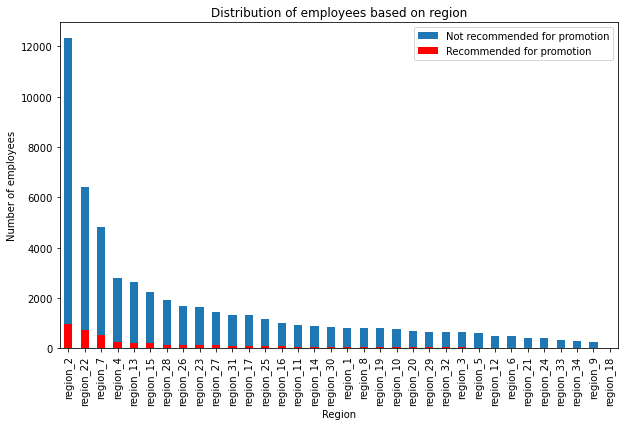

In [7]:
plt.subplots(figsize = (10,6))
hr_df.region.value_counts().plot.bar()
hr_df[hr_df.is_promoted == 1].region.value_counts().plot.bar(color = 'r')
plt.ylabel('Number of employees')
plt.xlabel('Region')
plt.legend(['Not recommended for promotion','Recommended for promotion'])
plt.title('Distribution of employees based on region')
plt.show()

#### Distribution of employees based on education level

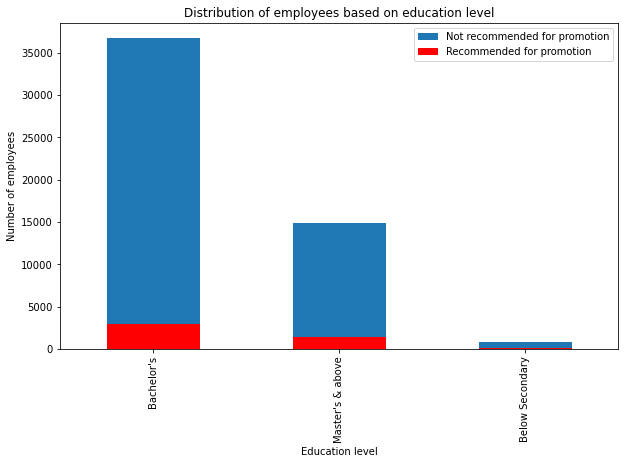

In [8]:
plt.subplots(figsize = (10,6))
hr_df.education.value_counts().plot.bar()
hr_df[hr_df.is_promoted == 1].education.value_counts().plot.bar(color = 'r')
plt.ylabel('Number of employees')
plt.xlabel('Education level')
plt.legend(['Not recommended for promotion','Recommended for promotion'])
plt.title('Distribution of employees based on education level')
plt.show()

#### Distribution of employees based on gender

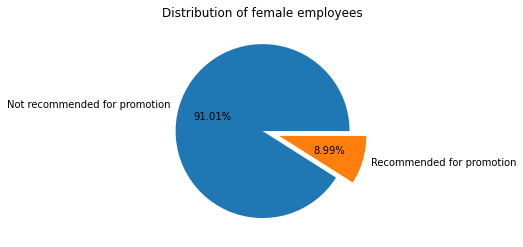

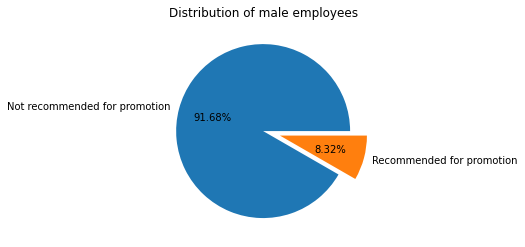

In [9]:
values = hr_df[hr_df.gender == 'f'].is_promoted.value_counts()
labels = ['Not recommended for promotion', 'Recommended for promotion']
explode = [0,0.2]
plt.pie(values, labels = labels, explode = explode, autopct = '%1.2f%%')
plt.title('Distribution of female employees')
plt.show()

values = hr_df[hr_df.gender == 'm'].is_promoted.value_counts()
labels = ['Not recommended for promotion', 'Recommended for promotion']
explode = [0,0.2]
plt.pie(values, labels = labels, explode = explode, autopct = '%1.2f%%')
plt.title('Distribution of male employees')
plt.show()

#### Distribution of employees based on recruitment channel 

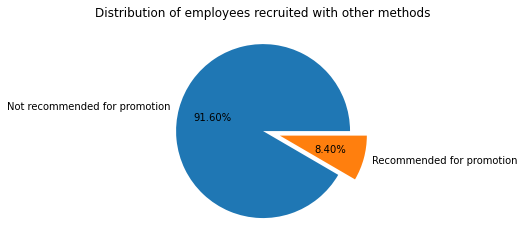

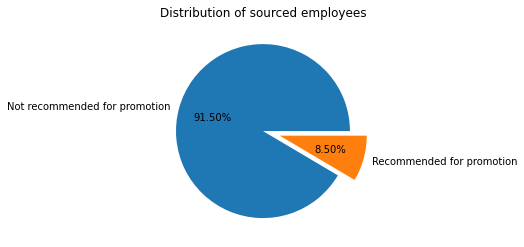

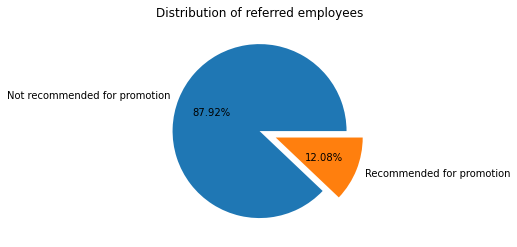

In [10]:
values = hr_df[hr_df.recruitment_channel == 'other'].is_promoted.value_counts()
labels = ['Not recommended for promotion', 'Recommended for promotion']
explode = [0,0.2]
plt.pie(values, labels = labels, explode = explode, autopct = '%1.2f%%')
plt.title('Distribution of employees recruited with other methods')
plt.show()

values = hr_df[hr_df.recruitment_channel == 'sourcing'].is_promoted.value_counts()
labels = ['Not recommended for promotion', 'Recommended for promotion']
explode = [0,0.2]
plt.pie(values, labels = labels, explode = explode, autopct = '%1.2f%%')
plt.title('Distribution of sourced employees')
plt.show()

values = hr_df[hr_df.recruitment_channel == 'referred'].is_promoted.value_counts()
labels = ['Not recommended for promotion', 'Recommended for promotion']
explode = [0,0.2]
plt.pie(values, labels = labels, explode = explode, autopct = '%1.2f%%')
plt.title('Distribution of referred employees')
plt.show()

#### Distribution of employees based on the number of trainings

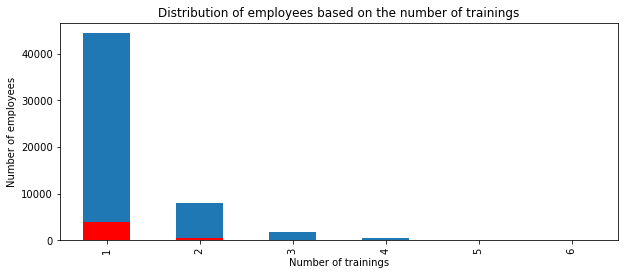

In [11]:
plt.subplots(figsize = (10,4))
hr_df.no_of_trainings.value_counts().plot.bar()
hr_df[hr_df['is_promoted']==1].no_of_trainings.value_counts().plot.bar(color = 'r')
plt.xlabel('Number of trainings')
plt.ylabel('Number of employees') 
plt.title('Distribution of employees based on the number of trainings')
plt.show()

#### Average length of service based on age

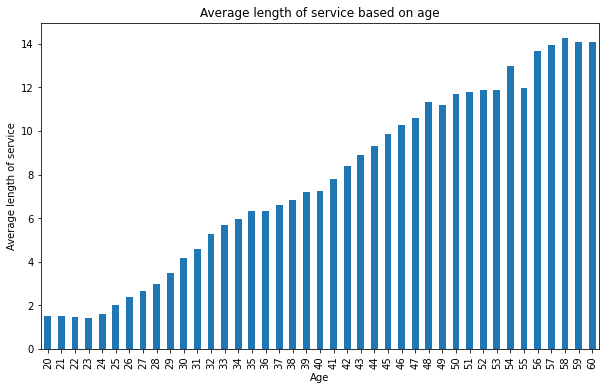

In [12]:
plt.subplots(figsize = (10,6))
hr_df.groupby('age').length_of_service.mean().plot.bar()
plt.ylabel('Average length of service')
plt.xlabel('Age')
plt.title('Average length of service based on age')
plt.show()

#### Distribution of employees based on age

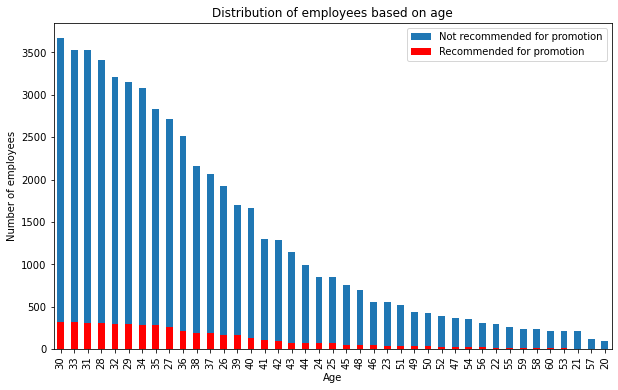

In [13]:
plt.subplots(figsize = (10,6))
hr_df.age.value_counts().plot.bar()
hr_df[hr_df.is_promoted == 1].age.value_counts().plot.bar(color = 'r')
plt.ylabel('Number of employees')
plt.xlabel('Age')
plt.legend(['Not recommended for promotion','Recommended for promotion'])
plt.title('Distribution of employees based on age')
plt.show()

#### Distribution of employees based on length of service

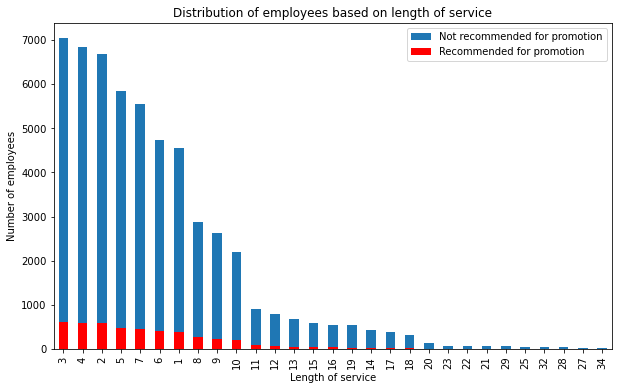

In [14]:
plt.subplots(figsize = (10,6))
hr_df.length_of_service.value_counts().plot.bar()
hr_df[hr_df.is_promoted == 1].length_of_service.value_counts().plot.bar(color = 'r')
plt.ylabel('Number of employees')
plt.xlabel('Length of service')
plt.legend(['Not recommended for promotion','Recommended for promotion'])
plt.title('Distribution of employees based on length of service')
plt.show()

#### Number of Employees recommended for promotion based on their previous year ratings

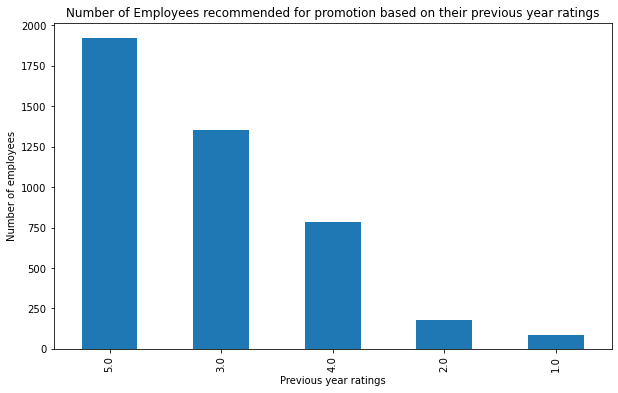

In [15]:
plt.subplots(figsize = (10,6))
hr_df[hr_df.is_promoted == 1].previous_year_rating.value_counts().plot.bar()
plt.ylabel('Number of employees')
plt.xlabel('Previous year ratings')
plt.title('Number of Employees recommended for promotion based on their previous year ratings')
plt.show()

#### Distribution of employees that met KPI based on promotion status

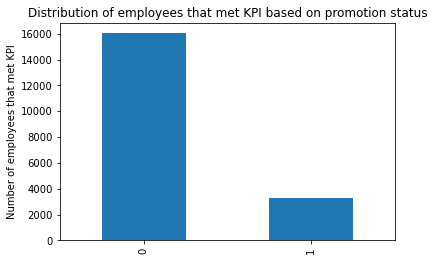

In [16]:
hr_df[hr_df['KPIs_met >80%'] == 1].is_promoted.value_counts().plot.bar()
plt.ylabel('Number of employees that met KPI')
plt.title('Distribution of employees that met KPI based on promotion status')
plt.show()

#### Distribution of employees that received award(s) based on promotion status

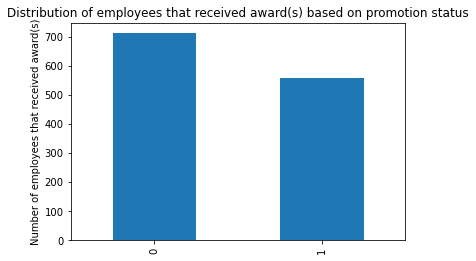

In [17]:
hr_df[hr_df['awards_won?'] == 1].is_promoted.value_counts().plot.bar()
plt.ylabel('Number of employees that received award(s)')
plt.title('Distribution of employees that received award(s) based on promotion status')
plt.show()

#### Distribution of employees that received award(s) and met KPI based on promotion status

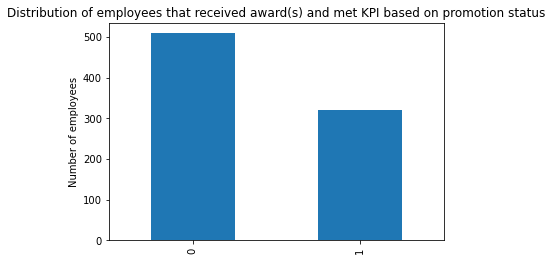

In [18]:
hr_df[(hr_df['awards_won?'] == 1) & (hr_df['KPIs_met >80%'] == 1)].is_promoted.value_counts().plot.bar()
plt.ylabel('Number of employees')
plt.title('Distribution of employees that received award(s) and met KPI based on promotion status')
plt.show()

#### Number of employees recommended for promotion based on average training score

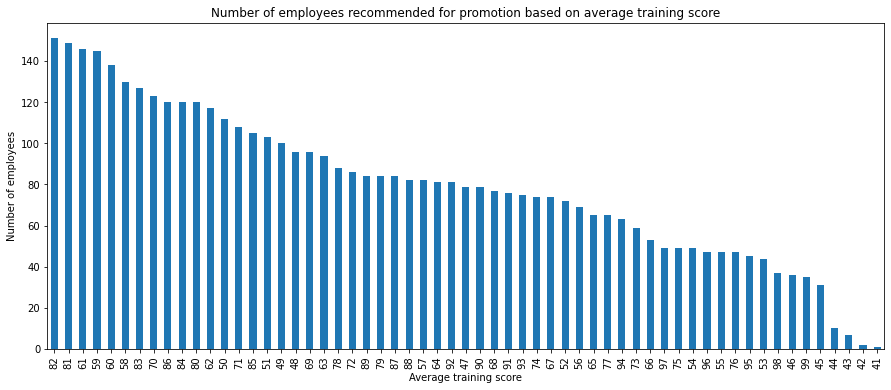

In [19]:
plt.subplots(figsize = (15,6))
hr_df[hr_df.is_promoted == 1].avg_training_score.value_counts().plot.bar()
plt.ylabel('Number of employees')
plt.xlabel('Average training score')
plt.title('Number of employees recommended for promotion based on average training score')
plt.show()

### 1.2 Cleanse and Transform the data <a id="hrtransform"></a>

#### Dropping of irrelevant columns 

In [20]:
hr_df = hr_df.drop(['employee_id'], axis = 1)
hr_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### Imputing of missing values

##### education 

In [21]:
dept = hr_df.department.unique() #unique values in department 

for i in dept:
    ed = hr_df[hr_df.department == i].education.mode()[0] #for each department, find the most common education level of employees
    print("Most common education in ", i, " is ", ed)

Most common education in  Sales & Marketing  is  Bachelor's
Most common education in  Operations  is  Bachelor's
Most common education in  Technology  is  Bachelor's
Most common education in  Analytics  is  Bachelor's
Most common education in  R&D  is  Bachelor's
Most common education in  Procurement  is  Bachelor's
Most common education in  Finance  is  Bachelor's
Most common education in  HR  is  Bachelor's
Most common education in  Legal  is  Bachelor's


In [22]:
hr_df['education'].fillna("Bachelor's", inplace = True)
hr_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


##### previous year rating 

In [23]:
pyrnull = hr_df[hr_df['previous_year_rating'].isnull()]
pyrnull.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [24]:
pyrnull['length_of_service'].unique() #show the unique values in length 
                                      #of service for rows of previous year 
                                      #ratings that are null

array([1], dtype=int64)

In [25]:
hr_df['previous_year_rating'].fillna(0, inplace = True)
hr_df[hr_df['previous_year_rating']==0].head() #check if it is imputed

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,Bachelor's,m,sourcing,1,30,0.0,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,0.0,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,0.0,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,0.0,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,0.0,1,1,0,47,0


#### Checking for outliers

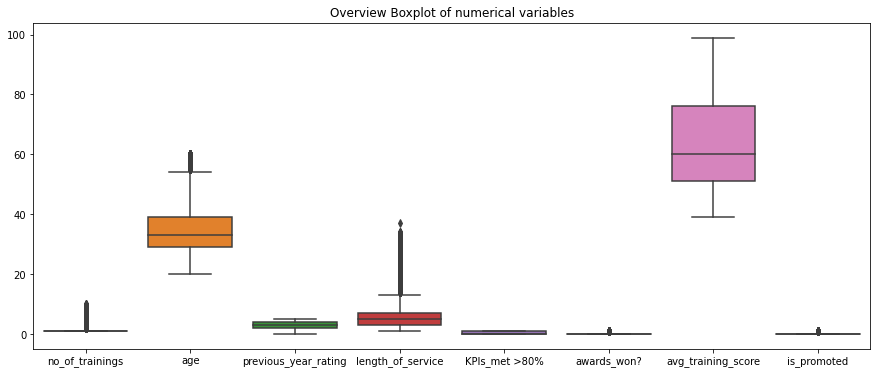

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(data=hr_df)
plt.title('Overview Boxplot of numerical variables')
plt.show()

#### Distribution of numerical data

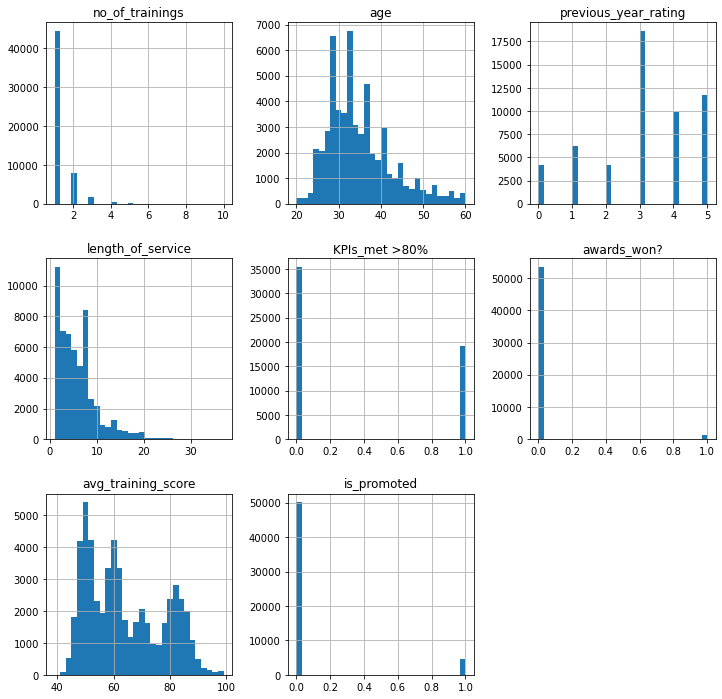

In [27]:
hr_df.hist(bins=30, figsize=(12,12))
plt.show()

#### Numerical Transformation 

In [28]:
yjt = YeoJohnsonTransformer(variables = ['age','avg_training_score','length_of_service'])
yjt.fit(hr_df)
hr_df_tf = yjt.transform(hr_df)

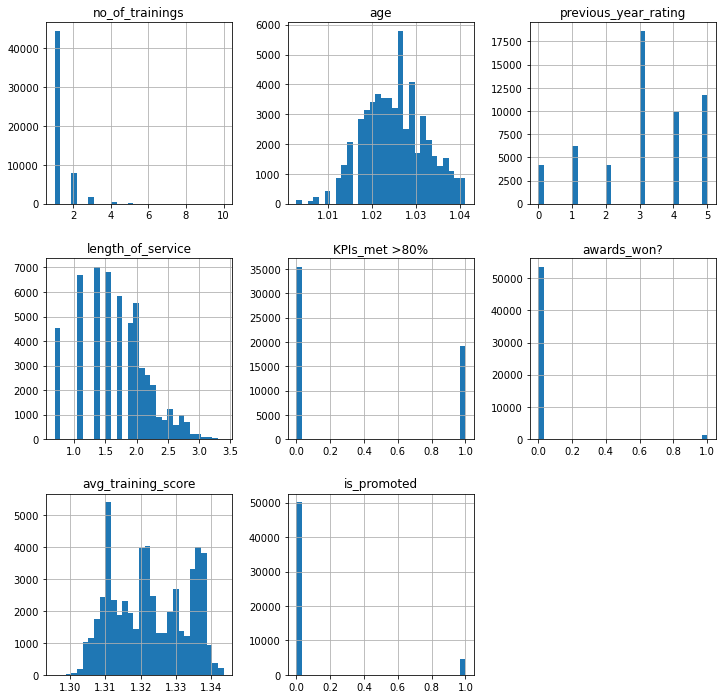

In [29]:
hr_df_tf.hist(bins=30, figsize=(12,12))
plt.show()

#### Categorical data encoding

In [30]:
dept_ordinal_mapping = {k: i for i, k in enumerate(hr_df_tf['department'].unique(), 0)}
hr_df_tf['department'] = hr_df_tf['department'].map(dept_ordinal_mapping)

In [31]:
dept_ordinal_mapping = {k: i for i, k in enumerate(hr_df_tf['region'].unique(), 0)}
hr_df_tf['region'] = hr_df_tf['region'].map(dept_ordinal_mapping)

In [32]:
edu_ordinal_mapping = {k: i for i, k in enumerate(hr_df_tf['education'].unique(), 0)}
hr_df_tf['education'] = hr_df_tf['education'].map(edu_ordinal_mapping)

In [33]:
gender_ordinal_mapping = {k: i for i, k in enumerate(hr_df_tf['gender'].unique(), 0)}
hr_df_tf['gender'] = hr_df_tf['gender'].map(gender_ordinal_mapping)

In [34]:
recruit_ordinal_mapping = {k: i for i, k in enumerate(hr_df_tf['recruitment_channel'].unique(), 0)}
hr_df_tf['recruitment_channel'] = hr_df_tf['recruitment_channel'].map(recruit_ordinal_mapping)
hr_df_tf.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,1,1.026877,5.0,2.107410,1,0,1.310364,0
1,1,1,1,1,1,1,1.021354,5.0,1.560891,0,0,1.321580,0
2,0,2,1,1,0,1,1.025895,3.0,1.998879,0,0,1.311554,0
3,0,3,1,1,1,2,1.030327,1.0,2.291195,0,0,1.311554,0
4,2,4,1,1,1,1,1.034408,3.0,1.075845,0,0,1.331048,0


#### Scaling

In [35]:
#drop target
target = hr_df_tf['is_promoted']
hr_df_tf.drop('is_promoted', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(hr_df_tf)

hr_df_scaled = scaler.transform(hr_df_tf)
hr_df_scaled = pd.DataFrame(hr_df_scaled, columns=hr_df_tf.columns)

#assign target variable back to scaled data frame
hr_df_scaled = hr_df_scaled.assign(is_promoted = target)

hr_df_scaled

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,-0.969600,-1.152091,-1.580483,-1.536223,-1.124089,-0.415276,0.228000,1.283878,0.762071,1.356878,-0.154018,-1.173748,0
1,-0.533367,-1.035042,0.548477,0.650947,0.758254,-0.415276,-0.564724,1.283878,-0.246487,-0.736986,-0.154018,-0.091947,0
2,-0.969600,-0.917993,0.548477,0.650947,-1.124089,-0.415276,0.087051,-0.052623,0.561785,-0.736986,-0.154018,-1.058971,0
3,-0.969600,-0.800944,0.548477,0.650947,0.758254,1.226063,0.723268,-1.389124,1.101233,-0.736986,-0.154018,-1.058971,0
4,-0.097135,-0.683895,0.548477,0.650947,0.758254,-0.415276,1.308914,-0.052623,-1.141600,-0.736986,-0.154018,0.821223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,-0.097135,0.369545,0.548477,0.650947,-1.124089,-0.415276,1.549423,-0.052623,1.922634,-0.736986,-0.154018,1.102713,0
54804,-0.533367,1.422986,-1.580483,-1.536223,0.758254,-0.415276,0.488279,-0.720874,0.333625,-0.736986,-0.154018,-0.443726,0
54805,0.339097,-0.215700,0.548477,0.650947,0.758254,-0.415276,-1.171721,1.283878,-0.635348,1.356878,-0.154018,1.155371,0
54806,-0.969600,2.593475,0.548477,0.650947,-1.124089,-0.415276,-0.753965,-1.389124,-1.141600,-0.736986,-0.154018,-1.675313,0


### 1.3 Correlation Analysis <a id="hrcorr"></a>

In [36]:
hr_df_scaled.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.103831,0.003085,-0.078665,0.010129,-0.005758,-0.054830,0.029567,-0.057735,0.054972,0.003873,0.368316,0.001357
region,-0.103831,1.000000,0.046783,0.040236,-0.028977,-0.077261,-0.114812,-0.038884,-0.072254,-0.039623,-0.000147,-0.052746,-0.037124
education,0.003085,0.046783,1.000000,0.024349,0.008198,0.033441,-0.434264,-0.121665,-0.303214,-0.006761,-0.000468,-0.027189,-0.028026
gender,-0.078665,0.040236,0.024349,1.000000,-0.003145,0.084501,-0.016034,-0.025053,-0.022102,-0.037400,0.002381,-0.049120,-0.011109
recruitment_channel,0.010129,-0.028977,0.008198,-0.003145,1.000000,0.004113,-0.006806,0.015322,-0.010086,0.019480,0.006298,0.014412,0.005461
no_of_trainings,-0.005758,-0.077261,0.033441,0.084501,0.004113,1.000000,-0.081280,-0.064119,-0.058666,-0.045576,-0.007628,0.036895,-0.024896
age,-0.054830,-0.114812,-0.434264,-0.016034,-0.006806,-0.081280,1.000000,0.218453,0.666644,-0.016437,-0.006291,-0.030078,-0.010813
previous_year_rating,0.029567,-0.038884,-0.121665,-0.025053,0.015322,-0.064119,0.218453,1.000000,0.314032,0.274593,0.021475,0.066010,0.125991
length_of_service,-0.057735,-0.072254,-0.303214,-0.022102,-0.010086,-0.058666,0.666644,0.314032,1.000000,-0.062954,-0.034132,-0.026953,-0.006603
KPIs_met >80%,0.054972,-0.039623,-0.006761,-0.037400,0.019480,-0.045576,-0.016437,0.274593,-0.062954,1.000000,0.097000,0.085047,0.221582


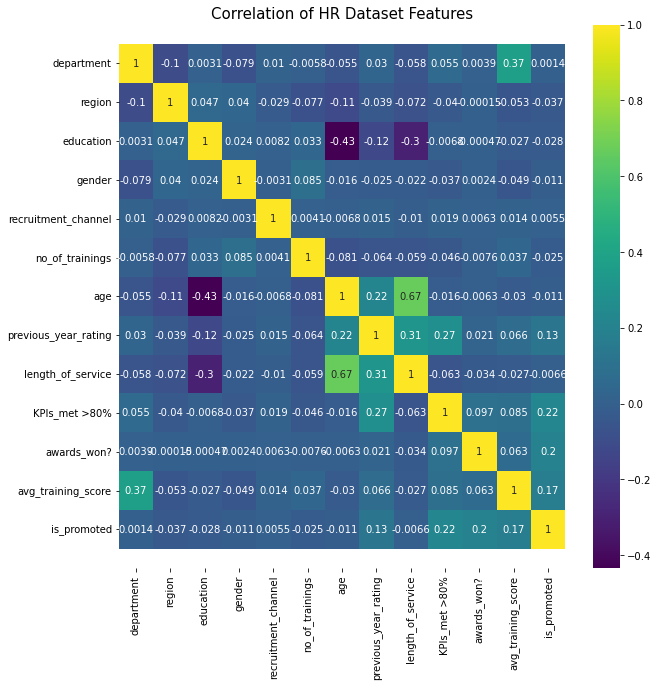

In [37]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Correlation of HR Dataset Features', size=15)
ax = sns.heatmap(hr_df_scaled.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Dropping of variables

In [38]:
hr_df_scaled.drop(['department','education','gender','recruitment_channel','no_of_trainings','age','length_of_service','region'], axis = 1, inplace = True)
hr_df_scaled.head()

,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.283878,1.356878,-0.154018,-1.173748,0
1,1.283878,-0.736986,-0.154018,-0.091947,0
2,-0.052623,-0.736986,-0.154018,-1.058971,0
3,-1.389124,-0.736986,-0.154018,-1.058971,0
4,-0.052623,-0.736986,-0.154018,0.821223,0


### 1.4 Export the data <a id="hrexport"></a> 

In [39]:
hr_df_scaled.to_csv('hr_data_new.csv', index = False)

## 2. Airbnb <a id="air"></a> 

### 2.1 Load and Explore the data <a id="airload"></a> 

In [40]:
listing_df = pd.read_csv("./listings.csv")
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,21/10/2013,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26/12/2014,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,1/10/2015,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,11/8/2019,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,28/7/2019,0.22,9,355


In [41]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [42]:
listing_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [43]:
listing_df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Average price of rooms based on neighbourhood groups

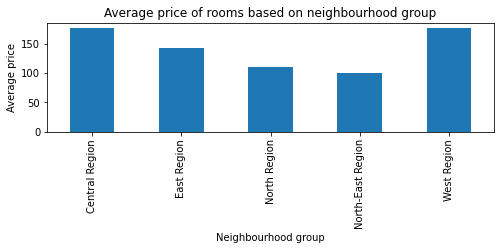

In [44]:
plt.subplots(figsize = (8,2))
listing_df.groupby('neighbourhood_group').price.mean().plot.bar()
plt.xlabel('Neighbourhood group')
plt.ylabel('Average price')
plt.title('Average price of rooms based on neighbourhood group')
plt.show()

#### Number of listings in each neighbourhood group

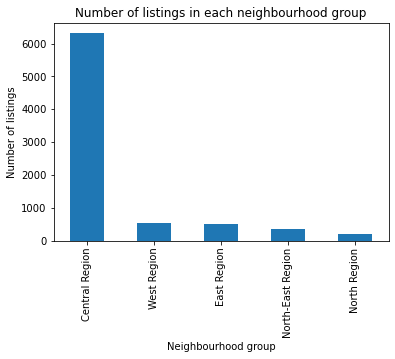

In [45]:
listing_df.neighbourhood_group.value_counts().plot.bar()
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of listings')
plt.title('Number of listings in each neighbourhood group')
plt.show()

#### Average price of rooms in central region based on neighbourhoods

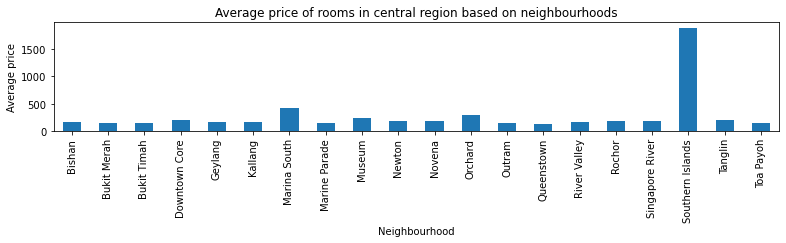

In [46]:
plt.subplots(figsize = (13,2))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('neighbourhood').price.mean().plot.bar()
plt.xlabel('Neighbourhood')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on neighbourhoods')
plt.show()

#### Average price of rooms in central region based on room type

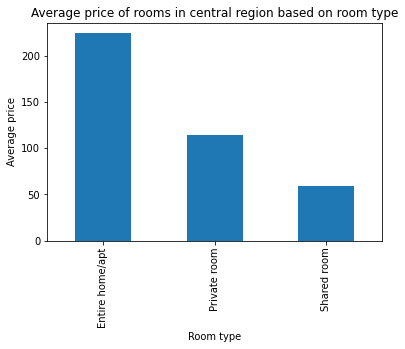

In [47]:
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('room_type').price.mean().plot.bar()
plt.xlabel('Room type')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on room type')
plt.show()

#### Average price of rooms in central region based on minimum nights

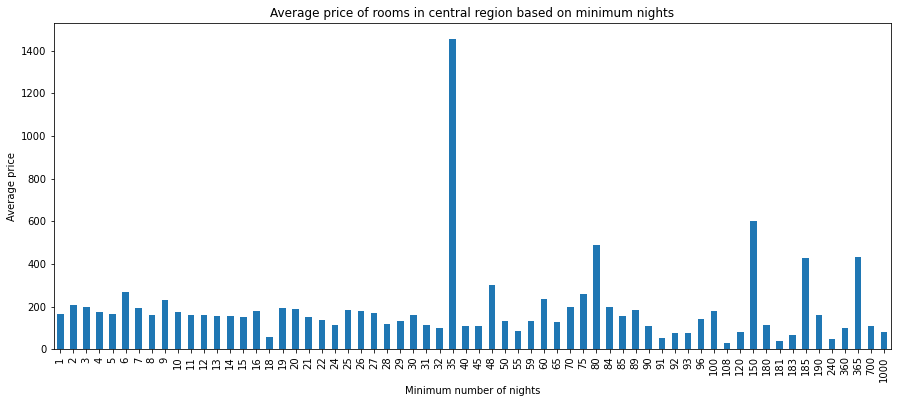

In [48]:
plt.subplots(figsize = (15,6))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('minimum_nights').price.mean().plot.bar()
plt.xlabel('Minimum number of nights')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on minimum nights')
plt.show()

#### Average price of rooms in central region based on number of reviews 

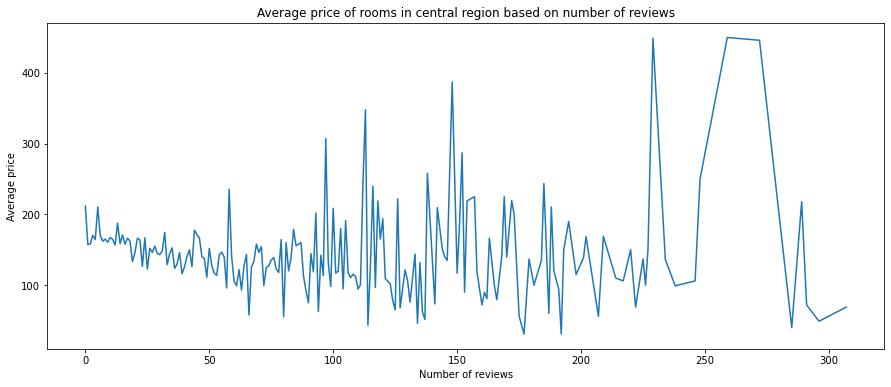

In [49]:
plt.subplots(figsize = (15,6))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('number_of_reviews').price.mean().plot.line()
plt.xlabel('Number of reviews')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on number of reviews')
plt.show()

#### Average price of rooms in central region based on last review date 

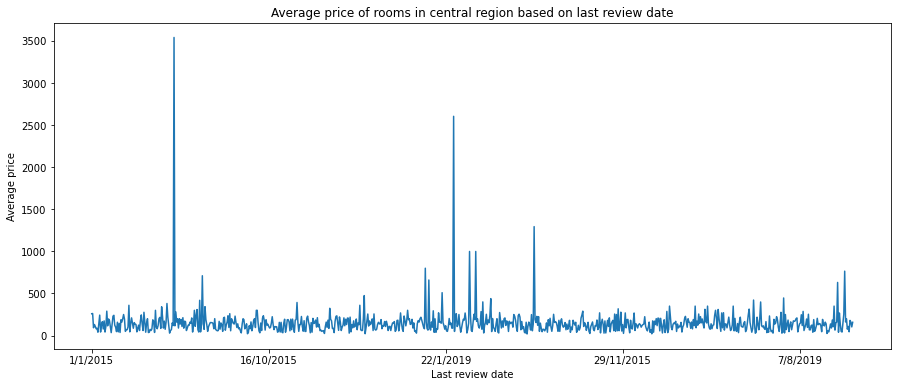

In [50]:
plt.subplots(figsize = (15,6))

listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('last_review').price.mean().plot.line()
plt.xlabel('Last review date')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on last review date')
plt.show()

#### Average price of rooms in central region based on the number of reviews per month

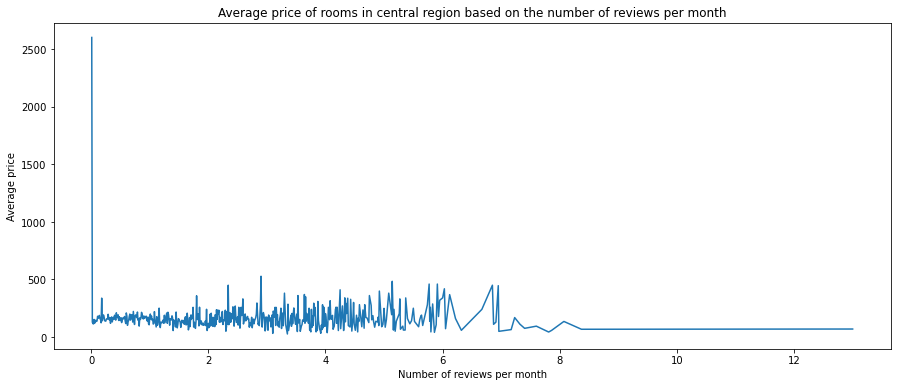

In [51]:
plt.subplots(figsize = (15,6))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('reviews_per_month').price.mean().plot.line()
plt.xlabel('Number of reviews per month')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on the number of reviews per month')
plt.show()

#### Average price of rooms in central region based on number of host listings


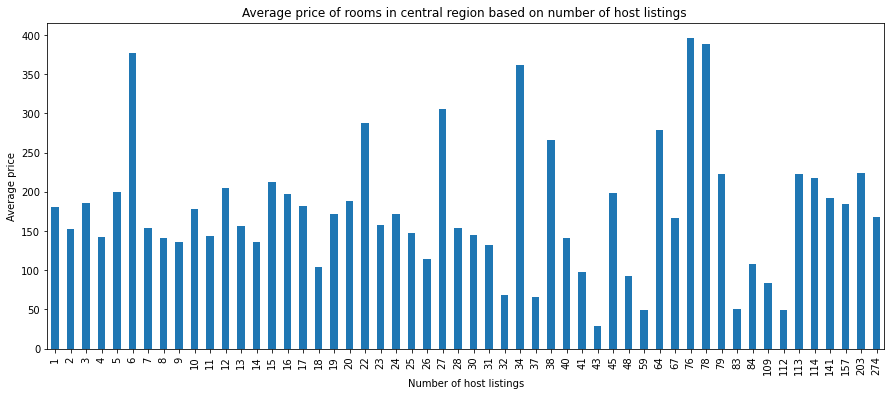

In [52]:
plt.subplots(figsize = (15,6))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('calculated_host_listings_count').price.mean().plot.bar()
plt.xlabel('Number of host listings')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on number of host listings ')
plt.show()

#### Average price of rooms in central region based on availability 

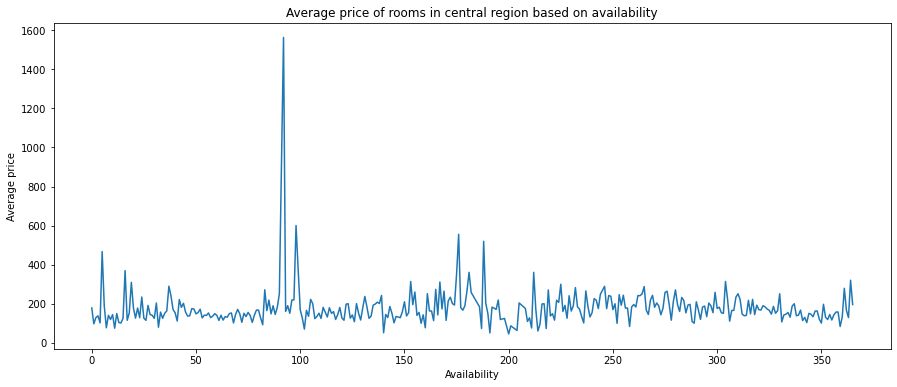

In [53]:
plt.subplots(figsize = (15,6))
listing_df[listing_df['neighbourhood_group']=='Central Region'].groupby('availability_365').price.mean().plot.line()
plt.xlabel('Availability')
plt.ylabel('Average price')
plt.title('Average price of rooms in central region based on availability')
plt.show()

### 2.2 Cleanse and Transform the data <a id="airtransform"></a>

#### Filtering the data

In [54]:
listing_df = listing_df[listing_df['neighbourhood_group']=='Central Region']
listing_df = listing_df.reset_index(drop = True) #resetting of index
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26/12/2014,0.28,1,365
1,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28875,103.80814,Private room,44,15,18,21/4/2019,0.23,32,331
2,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28837,103.81099,Private room,40,30,10,13/9/2018,0.11,32,276
3,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,Newton,1.31125,103.83816,Private room,65,2,125,22/8/2019,1.35,6,336
4,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28976,103.80896,Private room,44,30,13,2/2/2019,0.15,32,340


#### Extracting the year of the last review date and placing into a new column 

In [55]:
listing_df['year'] = listing_df['last_review'].str[-4:]
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26/12/2014,0.28,1,365,2014
1,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28875,103.80814,Private room,44,15,18,21/4/2019,0.23,32,331,2019
2,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28837,103.81099,Private room,40,30,10,13/9/2018,0.11,32,276,2018
3,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,Newton,1.31125,103.83816,Private room,65,2,125,22/8/2019,1.35,6,336,2019
4,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28976,103.80896,Private room,44,30,13,2/2/2019,0.15,32,340,2019


#### Dropping of unnecessary columns

In [56]:
listing_df.drop(['id','name','host_id','host_name','neighbourhood_group','latitude','longitude','last_review'], axis = 1, inplace = True)
listing_df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
0,Bukit Timah,Private room,81,90,18,0.28,1,365,2014
1,Bukit Merah,Private room,44,15,18,0.23,32,331,2019
2,Bukit Merah,Private room,40,30,10,0.11,32,276,2018
3,Newton,Private room,65,2,125,1.35,6,336,2019
4,Bukit Merah,Private room,44,30,13,0.15,32,340,2019


#### Imputing missing values

In [57]:
#viewing of rows with null values in reviews per month
filtered_null = listing_df[listing_df['reviews_per_month'].isnull()]
filtered_null.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
7,Geylang,Private room,81,90,0,NaN,1,173,NaN
12,Rochor,Private room,167,180,0,NaN,1,365,NaN
14,Queenstown,Shared room,208,1,0,NaN,1,0,NaN
18,Queenstown,Private room,128,3,0,NaN,1,365,NaN
25,Kallang,Private room,100,365,0,NaN,1,365,NaN


In [58]:
#number of rows of null values in reviews per month
len(filtered_null['reviews_per_month'])

2165

In [59]:
#number of rows of null values in year
len(filtered_null['year'])

2165

In [60]:
#viewing the number of unique values in number of reviews column 
filtered_null['number_of_reviews'].unique()

array([0], dtype=int64)

In [61]:
listing_df.fillna(0, inplace = True)
listing_df.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
dtype: int64

#### Converting of data type

In [62]:
listing_df['year'] = listing_df['year'].astype(int)

#### Checking of outliers

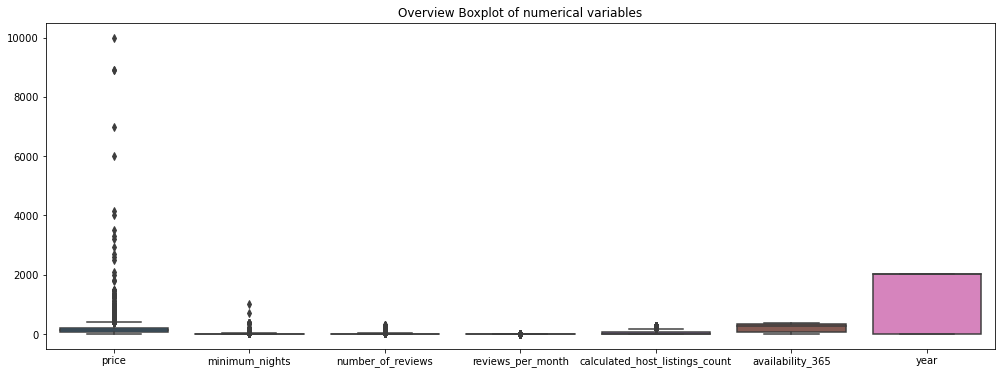

In [63]:
plt.figure(figsize=(17,6))
sns.boxplot(data=listing_df)
plt.title('Overview Boxplot of numerical variables')
plt.show()

#### Distribution of numerical variables

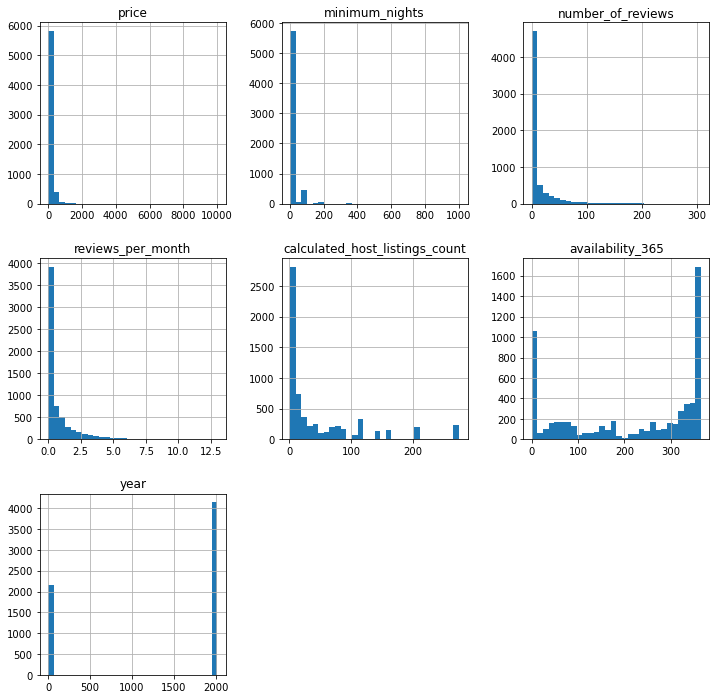

In [64]:
listing_df.hist(bins=30, figsize=(12,12))
plt.show()

#### Numerical transformation

In [65]:
yjt = YeoJohnsonTransformer(variables = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count'])
yjt.fit(listing_df)
listing_df_tf = yjt.transform(listing_df)

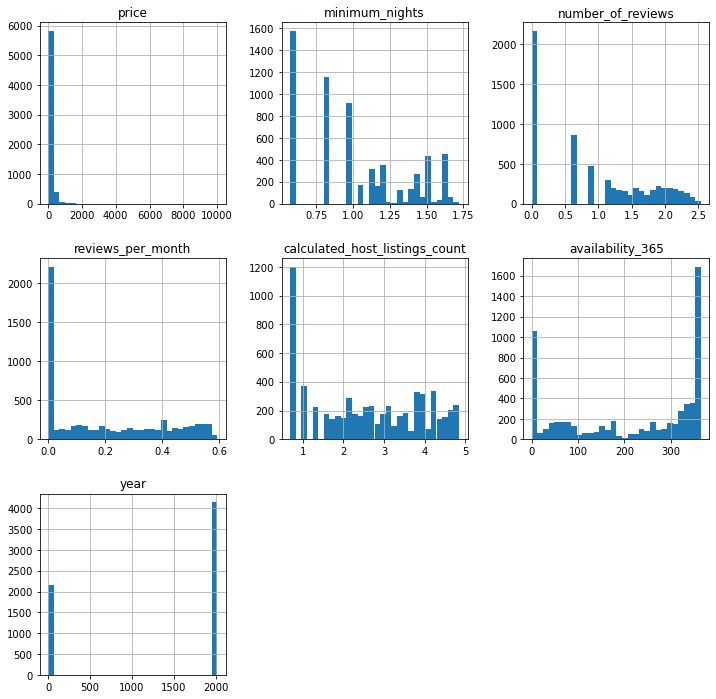

In [66]:
listing_df_tf.hist(bins=30, figsize=(12,12))
plt.show()

#### Categorical encoding

In [67]:
room_ordinal_mapping = {k: i for i, k in enumerate(listing_df_tf['room_type'].unique(), 0)}
listing_df_tf['room_type'] = listing_df_tf['room_type'].map(room_ordinal_mapping).astype(int)
listing_df_tf.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
0,Bukit Timah,0,81,1.620342,1.866558,0.202427,0.680453,365,2014
1,Bukit Merah,0,44,1.393207,1.866558,0.175112,3.188950,331,2019
2,Bukit Merah,0,40,1.506672,1.644258,0.095798,3.188950,276,2018
3,Newton,0,65,0.816478,2.384556,0.455853,1.848046,336,2019
4,Bukit Merah,0,44,1.506672,1.747415,0.124694,3.188950,340,2019


In [68]:
neighbour_ordinal_mapping = {k: i for i, k in enumerate(listing_df_tf['neighbourhood'].unique(), 0)}
listing_df_tf['neighbourhood'] = listing_df_tf['neighbourhood'].map(neighbour_ordinal_mapping)
listing_df_tf.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
0,0,0,81,1.620342,1.866558,0.202427,0.680453,365,2014
1,1,0,44,1.393207,1.866558,0.175112,3.188950,331,2019
2,1,0,40,1.506672,1.644258,0.095798,3.188950,276,2018
3,2,0,65,0.816478,2.384556,0.455853,1.848046,336,2019
4,1,0,44,1.506672,1.747415,0.124694,3.188950,340,2019


#### Standard scaling

In [69]:
#drop target
target = listing_df_tf['price']
listing_df_tf.drop('price', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(listing_df_tf)

listing_df_scaled = scaler.transform(listing_df_tf)
listing_df_scaled = pd.DataFrame(listing_df_scaled, columns=listing_df_tf.columns)

#assign target back to scaled dataset
listing_df_scaled = listing_df_scaled.assign(price = target)

listing_df_scaled.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,price
0,-1.710009,-1.243975,1.720867,1.139782,-0.012194,-1.370618,1.041662,0.718033,81
1,-1.485787,-1.243975,1.080109,1.139782,-0.147512,0.474925,0.804864,0.723250,44
2,-1.485787,-1.243975,1.400198,0.869294,-0.540434,0.474925,0.421809,0.722207,40
3,-1.261565,-1.243975,-0.546862,1.770067,1.243285,-0.511600,0.839687,0.723250,65
4,-1.485787,-1.243975,1.400198,0.994811,-0.397280,0.474925,0.867546,0.723250,44


### 2.3 Correlation Analysis <a id="aircorr"></a>

In [70]:
listing_df_scaled.corr()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,price
neighbourhood,1.000000,0.052685,0.083213,-0.016248,-0.025832,0.047466,0.089016,0.008319,0.080290
room_type,0.052685,1.000000,-0.057404,0.009844,0.030170,0.248080,0.087627,-0.000175,0.093064
minimum_nights,0.083213,-0.057404,1.000000,-0.268210,-0.293665,0.283974,0.183206,-0.201781,-0.039771
number_of_reviews,-0.016248,0.009844,-0.268210,1.000000,0.862749,-0.173733,-0.124616,0.817892,-0.080450
reviews_per_month,-0.025832,0.030170,-0.293665,0.862749,1.000000,-0.135319,-0.107183,0.733954,-0.058923
calculated_host_listings_count,0.047466,0.248080,0.283974,-0.173733,-0.135319,1.000000,0.442795,-0.105246,-0.002835
availability_365,0.089016,0.087627,0.183206,-0.124616,-0.107183,0.442795,1.000000,-0.095074,0.020066
year,0.008319,-0.000175,-0.201781,0.817892,0.733954,-0.105246,-0.095074,1.000000,-0.086403
price,0.080290,0.093064,-0.039771,-0.080450,-0.058923,-0.002835,0.020066,-0.086403,1.000000


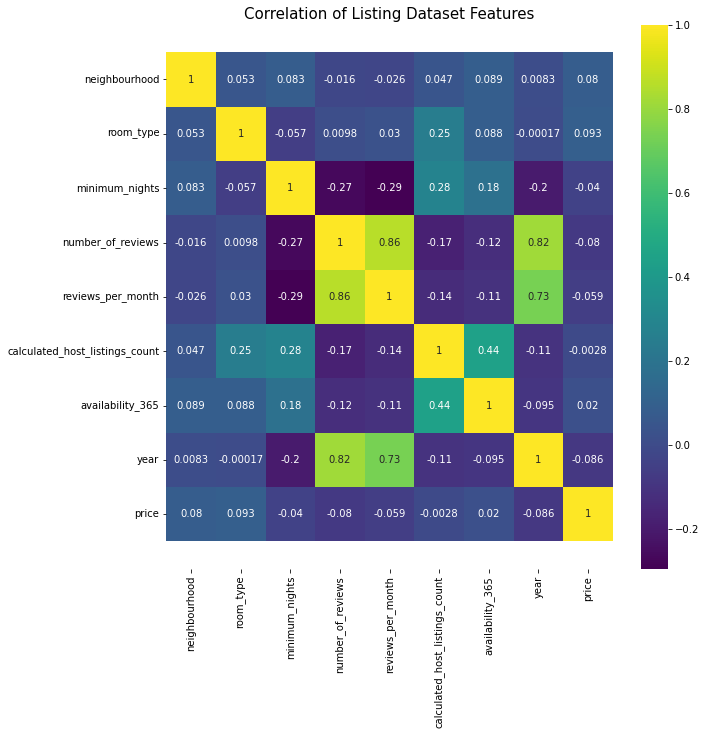

In [71]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Correlation of Listing Dataset Features', size=15)
ax = sns.heatmap(listing_df_scaled.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Dropping of variables

In [72]:
listing_df_scaled.drop('calculated_host_listings_count', axis = 1, inplace = True)
listing_df_scaled.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,year,price
0,-1.710009,-1.243975,1.720867,1.139782,-0.012194,1.041662,0.718033,81
1,-1.485787,-1.243975,1.080109,1.139782,-0.147512,0.804864,0.723250,44
2,-1.485787,-1.243975,1.400198,0.869294,-0.540434,0.421809,0.722207,40
3,-1.261565,-1.243975,-0.546862,1.770067,1.243285,0.839687,0.723250,65
4,-1.485787,-1.243975,1.400198,0.994811,-0.397280,0.867546,0.723250,44


### 2.4 Export the data <a id="airexport"></a>

In [73]:
listing_df_scaled.to_csv('listings_new.csv', index = False)